El código a continuación corresponde a la predicción de una semana de demanda de energía (Retiro de energía MWh) de una barra del Sistema Nacional Chileno en un periodo en especifico, a partir de parámetros ambientales, retiros de energías correspondientes a la misma hora de semanas anteriores, tipo de día, día de la semana, entre otras. El listado de variables se puede ver a continuación: 

   Año: Año de la demanda
   Ts_Valor: Temperatura de la comuna
   Retiro suma MWh: Energía demandada en la central semana actual
   Retiro suma MWh hace 1 semana promedio: Energía demandada promedio de la semana actual
   Hora: Hora de la demanda
   HR_Valor: Humedad
   Td_Valor: Punto Rocio
   dd_Valor: Dirección del viento
   ff_Valor: Rápidez de viento
   VRB_Valor: Viento de dirección Variable

Por otro lado, se compara los resultados del mejor modelo de machine learning utilizado (SVM) con el mejor modelo de red neuronal utilizado (basado en LSTM)   

---

## Procesamiento de Datos 🖥️ 


Importar dataset y eliminación de ruido


In [3]:
import pandas as pd

# Se carga la Base de Datos correspondiente a una Central de Santiago y diferentes parámetros climáticos
df = pd.read_csv(
    "BDD_Barra.csv",sep=";",encoding='latin1'
)

# Eliminar ruido presente en la BDD
df=df[df["Retiro suma MWh"]<1000]

In [6]:
# Reordenamiento de datos, se crean columnas con la energía correspondiente a la semana y hora pasada (por eso 168 horas en el pasado por cada semana). 
# También se agrega la columna con el valore de la energía de la misma hora del día anterior.

df_Retiro_1S = df["Retiro suma MWh"]  # Seleccionar la columna "Retiro suma MWh"
df_Retiro_1S = df_Retiro_1S[:-168]  # Eliminar las últimas 168 filas (1 semana)

# Crear un DataFrame df_Retiro_2S para representar la energía de las 2 semanas anteriores
df_Retiro_2S = df["Retiro suma MWh"]
df_Retiro_2S = df_Retiro_2S[:-168*2]  # Eliminar las últimas 336 filas (2 semanas)

# Crear un DataFrame df_Retiro_3S para representar la energía de las 3 semanas anteriores
df_Retiro_3S = df["Retiro suma MWh"]
df_Retiro_3S = df_Retiro_3S[:-168*3]  # Eliminar las últimas 504 filas (3 semanas)

# Crear un DataFrame df_Retiro_4S para representar la energía de las 4 semanas anteriores
df_Retiro_4S = df["Retiro suma MWh"]
df_Retiro_4S = df_Retiro_4S[:-168*4]  # Eliminar las últimas 672 filas (4 semanas)

# Crear un DataFrame df_Retiro_5S para representar la energía de las 5 semanas anteriores
df_Retiro_5S = df["Retiro suma MWh"]
df_Retiro_5S = df_Retiro_5S[:-168*5]  # Eliminar las últimas 840 filas (5 semanas)

# Crear un DataFrame df_Retiro_6S para representar la energía de las 6 semanas anteriores
df_Retiro_6S = df["Retiro suma MWh"]
df_Retiro_6S = df_Retiro_6S[:-168*6]  # Eliminar las últimas 1008 filas (6 semanas)

# Crear un DataFrame df_Retiro_24h para representar la energía de las últimas 24 horas
df_Retiro_24h = df["Retiro suma MWh"]
df_Retiro_24h = df_Retiro_24h[:-24]  # Eliminar las últimas 24 filas (24 horas)

In [7]:
# Reordenar el índice de los DataFrames para que comience en 0 y elimine el índice anterior
df_Retiro_1S = df_Retiro_1S.reset_index(drop=True)

df_Retiro_2S = df_Retiro_2S.reset_index(drop=True)

df_Retiro_3S = df_Retiro_3S.reset_index(drop=True)

df_Retiro_4S = df_Retiro_4S.reset_index(drop=True)

df_Retiro_5S = df_Retiro_5S.reset_index(drop=True)

df_Retiro_6S = df_Retiro_6S.reset_index(drop=True)

df_Retiro_24h = df_Retiro_24h.reset_index(drop=True)


In [8]:

# Elimina las primeras 168 filas del DataFrame original
df = df.iloc[168: , :]

# Restablece el índice del DataFrame para que comience en 0 y elimina el índice anterior
df = df.reset_index(drop=True)

# Renombra la columna df_Retiro_1S como "Retiro suma MWh hace 1 semana"
df_Retiro_1S = df_Retiro_1S.rename("Retiro suma MWh hace 1 semana")

# Asigna la columna renombrada al DataFrame original
df["Retiro suma MWh hace 1 semana"] = df_Retiro_1S

# Repite el proceso para las siguientes semanas anteriores (2S, 3S, 4S, 5S, 6S)
# Cada vez eliminando las primeras 168 filas, reiniciando el índice y renombrando las columnas

# Elimina las primeras 168 filas nuevamente
df = df.iloc[168: , :]

# Restablece el índice nuevamente
df = df.reset_index(drop=True)

# Renombra la columna df_Retiro_2S como "Retiro suma MWh hace 2 semanas" y así sucesivamente
df_Retiro_2S = df_Retiro_2S.rename("Retiro suma MWh hace 2 semanas")
df["Retiro suma MWh hace 2 semanas"] = df_Retiro_2S

df = df.iloc[168: , :]
df = df.reset_index(drop=True)
df_Retiro_3S = df_Retiro_3S.rename("Retiro suma MWh hace 3 semanas")
df["Retiro suma MWh hace 3 semanas"] = df_Retiro_3S

df = df.iloc[168: , :]
df = df.reset_index(drop=True)
df_Retiro_4S = df_Retiro_4S.rename("Retiro suma MWh hace 4 semanas")
df["Retiro suma MWh hace 4 semanas"] = df_Retiro_4S

df = df.iloc[168: , :]
df = df.reset_index(drop=True)
df_Retiro_5S = df_Retiro_5S.rename("Retiro suma MWh hace 5 semanas")
df["Retiro suma MWh hace 5 semanas"] = df_Retiro_5S

df = df.iloc[168: , :]
df = df.reset_index(drop=True)
df_Retiro_6S = df_Retiro_6S.rename("Retiro suma MWh hace 6 semanas")
df["Retiro suma MWh hace 6 semanas"] = df_Retiro_6S

# Elimina las primeras 24 filas para representar las últimas 24 horas
df = df.iloc[24: , :]

# Restablece el índice nuevamente
df = df.reset_index(drop=True)

# Renombra la columna df_Retiro_24h como "Retiro suma MWh hace 24 horas"
df_Retiro_24h = df_Retiro_24h.rename("Retiro suma MWh hace 24 horas")
df["Retiro suma MWh hace 24 horas"] = df_Retiro_24h

# Calcula el promedio de las últimas 168 filas (1 semana) en la columna "Retiro suma MWh" y crea una nueva columna
df["Retiro suma MWh hace 1 semana promedio"] = df["Retiro suma MWh"].rolling(168).mean()

# Elimina las primeras 168 filas nuevamente
df = df.iloc[168: , :]


Estudio de las variables númericas


<Figure size 640x480 with 0 Axes>

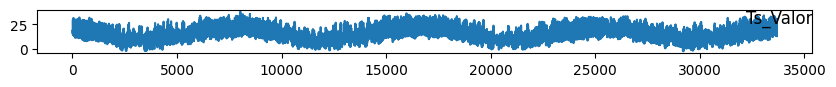

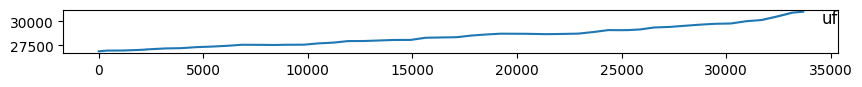

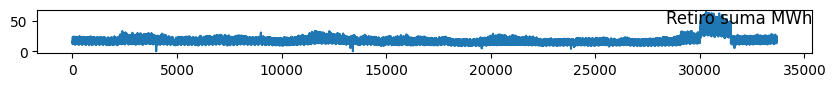

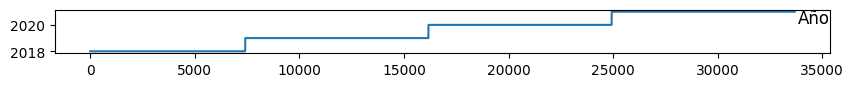

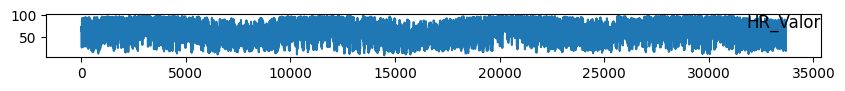

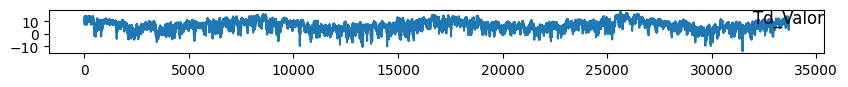

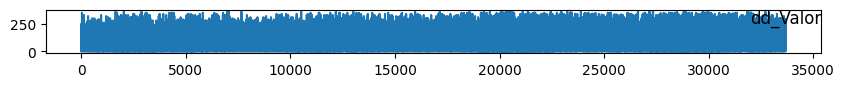

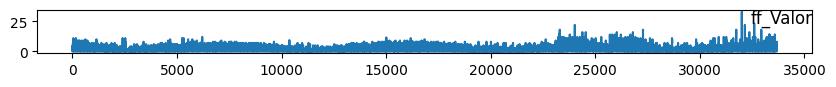

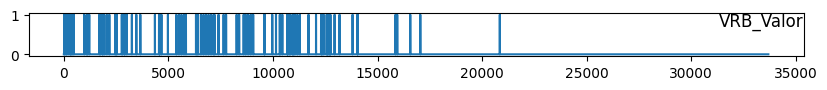

In [9]:
# Importar pyplot de matplotlib
from matplotlib import pyplot

# Definir una lista de nombres de columnas a graficar (Variables presentadas al comienzo del código)
groups = ["Ts_Valor", "uf", "Retiro suma MWh", "Año", "HR_Valor", "Td_Valor", "dd_Valor", "ff_Valor", "VRB_Valor"]

# Obtener los valores del DataFrame
values = df.values

# Inicializar una variable para el índice de las subtramas
i = 1

# Crear una nueva figura
pyplot.figure()

# Iterar a través de las columnas y crear gráficos para cada una
for group in groups:
    # Crear una nueva subtrama
    pyplot.figure(figsize=(10, 6))
    pyplot.subplot(len(groups), 1, i)
    
    # Graficar los valores de la columna actual
    pyplot.plot(df[group].values)
    
    # Establecer el título de la subtrama con el nombre de la columna
    pyplot.title(group, y=0.5, loc='right')
    
    i += 1

# Mostrar los gráficos
pyplot.show()


Estudio de las Variables

In [10]:
# Estudio del tipo de Variables
df.dtypes

Faena                                      object
Comuna                                     object
Region                                     object
Sector                                     object
SubSector                                  object
Sistema                                    object
CODPuntoConexion                           object
PuntoConexion                              object
PotConec                                   object
DistribuidoraCL                            object
Tipo                                       object
Año                                         int64
Mes                                        object
Día                                         int64
Día de la semana                           object
Tipo de día                                object
Hora                                        int64
Retiro suma MWh                           float64
Ts_Valor                                  float64
uf                                        float64


##  Regresión


**SVM (ML)**

Procesamiento de datos ajustados al modelo ML

In [11]:
# Importar las bibliotecas necesarias
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import pandas as pd

# Definir las transformaciones que se aplicarán a las columnas
preprocessing = ColumnTransformer(
    [
        # Escala Min-Max para algunas columnas numéricas
        (
            "Scale_MinMax",
            MinMaxScaler(),
            [
                "Año",
                "Ts_Valor",
                "Retiro suma MWh",
                "Retiro suma MWh hace 1 semana promedio",
                "Hora",
                'HR_Valor',
                'Td_Valor',
                'dd_Valor',
                'ff_Valor',
                'VRB_Valor',
                'Ts_Valor',
            ],
        ),
        # Codificación One-Hot para la columna "Mes"
        (
            "One Hot Encoding",
            OneHotEncoder(sparse=False, handle_unknown="ignore"),
            [
                "Mes",
            ],
        ),
    ],
)

# Aplicar las transformaciones al DataFrame df y obtener el DataFrame procesado
df_procesado = preprocessing.fit_transform(df)

# Crear un DataFrame con los datos procesados y etiquetas de columnas
processed_data_df = pd.DataFrame(
    df_procesado, columns=preprocessing.get_feature_names_out()
)

/home/alonso/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
# Importar la función train_test_split de scikit-learn
from sklearn.model_selection import train_test_split

# Separar las etiquetas (variable objetivo, la cual es el Retiro de Energía, en su respectiva hora de la semana a predecir) de las características (variables predictoras)
labels = df.loc[:, "Retiro suma MWh"]
features = df.drop(columns=[])

# Calcular la longitud del DataFrame original
Largo_df = len(df)

# Definir el número de semanas pasadas (N) para eliminar del conjunto de datos
N = 2

# Actualizar la longitud del DataFrame para excluir N semanas (168 horas por semana)
Largo_df = Largo_df - 168 * N

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# - X_train y y_train son las características y etiquetas de entrenamiento
# - X_val y y_val son las características y etiquetas de validación
# - X_test y y_test son las características y etiquetas de prueba
# Se utiliza un tamaño de prueba del 10% y una semilla aleatoria para reproducibilidad
X_train, X_val, y_train, y_val = train_test_split(
    features[0:(Largo_df - 168 * 2)],
    labels[168:(Largo_df - 168)],
    test_size=0.1,
    random_state=42
)

# Obtener las etiquetas y características de prueba para la última semana
y_test = labels[(Largo_df - 168 + 1):Largo_df]
X_test = features[(Largo_df - 168 * 2 + 1):(Largo_df - 168)]
#y_test.tolist() 

In [15]:
# Importar métricas de evaluación desde scikit-learn
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import sklearn

# Definir una función llamada train_and_evaluate que entrena y evalúa un modelo
def train_and_evaluate(
    pipe, print_=True, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test
):
    # Entrenar el modelo utilizando los datos de entrenamiento
    pipe.fit(X_train, y_train)
    
    # Realizar predicciones en los datos de prueba
    y_pred = pipe.predict(X_test)

    # Calcular el coeficiente de determinación (R-cuadrado) para evaluar el modelo
    r2 = r2_score(y_test, y_pred)

    # Calcular el error absoluto medio (MAE) para evaluar el modelo
    mae = mean_absolute_error(y_test, y_pred)

    # Si se establece print_=True, imprimir el R-cuadrado y el MAE
    if print_:
        print("R-squared:", r2)
        print("MAE:", mae)
    
    # Devolver el R-cuadrado, el MAE y las predicciones del modelo
    return r2, mae, y_pred


In [16]:
# Importar DummyRegressor de scikit-learn
from sklearn.dummy import DummyRegressor

# Crear una tubería (pipeline) que incluye preprocesamiento y el DummyRegressor
dummy_pipe = Pipeline(
    steps=[
        ("Preprocessing", preprocessing),  # Preprocesamiento definido anteriormente
        ("Tree", DummyRegressor(strategy="mean")),  # DummyRegressor que predice la media
    ]
)

# Llamar a la función train_and_evaluate para entrenar y evaluar el modelo DummyRegressor
# La función devuelve el coeficiente de determinación (R-cuadrado) y el error absoluto medio (MAE)
r2_score, mean_absolute_error, predictions = train_and_evaluate(dummy_pipe)

# Imprimir el coeficiente de determinación (R-cuadrado) y el error absoluto medio (MAE)
print("R-squared:", r2_score)
print("Mean Absolute Error:", mean_absolute_error)

R-squared: -0.005207910382056369
MAE: 3.7319469382908856
R-squared: -0.005207910382056369
Mean Absolute Error: 3.7319469382908856


/home/alonso/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
# Importar las bibliotecas necesarias de scikit-learn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_absolute_error

# Crear un pipeline de procesamiento de datos
selection_pipeline = make_pipeline(
    preprocessing,  # Preprocesamiento definido anteriormente
    SelectKBest(f_regression, k=14),  # Selección de las 14 mejores características
    SVR(kernel='rbf', C=100, epsilon=0.45, tol=1e-4, degree=3)  # Modelo SVR con kernel RBF
)

# Llamar a la función train_and_evaluate para entrenar y evaluar el modelo
r2, mae, y_pred = train_and_evaluate(selection_pipeline)

# Imprimir el coeficiente de determinación (R-cuadrado) y el error absoluto medio (MAE)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

/home/alonso/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R-squared: 0.8755440753819536
MAE: 1.049878130569952
R-squared: 0.8755440753819536
Mean Absolute Error: 1.049878130569952


In [57]:
#rrr=y_test

In [18]:
# Importar la función sqrt (raíz cuadrada) desde el módulo math y mean_squared_error de sklearn
from math import sqrt
from sklearn.metrics import mean_squared_error 

# Calcular el error cuadrático medio (MSE) entre las etiquetas reales y las predicciones
mse = mean_squared_error(y_test, y_pred)

# Calcular la raíz cuadrada del MSE para obtener el RMSE
rmse = sqrt(mse)

# Imprimir el valor del RMSE en la consola
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.500


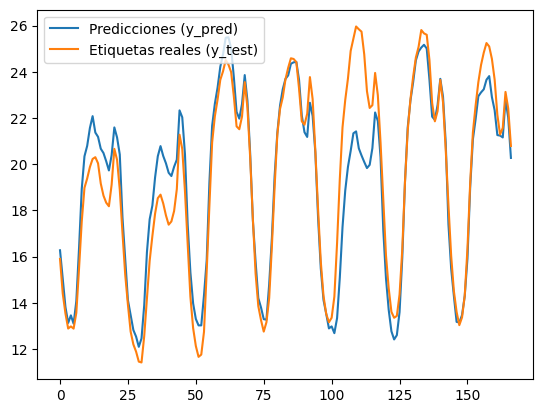

In [19]:
# Importar pyplot desde matplotlib
from matplotlib import pyplot as plt

# Crear un gráfico con dos series de datos
plt.plot(y_pred.tolist(), label="Predicciones (y_pred)")  # Línea para las predicciones
plt.plot(y_test.tolist(), label="Etiquetas reales (y_test)")  # Línea para las etiquetas reales

# Agregar una leyenda al gráfico para indicar qué línea corresponde a qué datos
plt.legend()

# Mostrar el gráfico en la ventana de visualización
plt.show()

In [ ]:
# Comparador N Semanas pasados, para evaluar la predicción general del código en diferentes semanas 
# No es necesario correr estas líneas de código, dado que cada predicción de cada semana conlleva un tiempo considerable, 
# este parte del código es para evaluar el comportamiento principalmente 



from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import (
    SelectKBest,
    SelectPercentile,
    f_classif,
    f_regression,
    mutual_info_classif,
)


# Lista para almacenar los resultados RMSE
rmse_pred = 0
rmse_ant = 0

# Variables para almacenar las predicciones y etiquetas anteriores
y_pred_ant = 0
y_pred_real = 0

# Variables para almacenar la diferencia absoluta entre las etiquetas reales y predicciones anteriores
mw_ant = 0
mw_pred = 0

# Iterar sobre un rango de 10 meses
for i in range(10):
    labels = df.loc[:, "Retiro suma MWh"]
    features = df.drop(columns=[])
    Largo_df = len(df)
    Largo_df = Largo_df - 168 * i

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_val, y_train, y_val = train_test_split(
        features[0:(Largo_df - 168 * 2)],
        labels[168:(Largo_df - 168)],
        test_size=0.1,
        random_state=2
    )

    y_test = labels[(Largo_df - 168 + 1):Largo_df]
    X_test = features[(Largo_df - 168 * 2 + 1):(Largo_df - 168)]

    if i > 0:
        # Calcular el RMSE entre las etiquetas reales y las etiquetas anteriores
        print("Anterior RMSE:", sqrt(mean_squared_error(y_test, y_test_aux)))
        rmse_ant = rmse_ant + sqrt(mean_squared_error(y_test, y_test_aux))
        mw_ant = mw_ant + abs(np.subtract(y_test.values, y_test_aux.values))

    def train_and_evaluate(
        pipe, print_=True, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test
    ):
        # Entrenar el modelo y hacer predicciones
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        return r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), y_pred

    # Crear un pipeline con preprocesamiento y modelo SVR
    selection_pipeline = Pipeline(
        [
            ("preprocessing", preprocessing),
            ("selection", SelectKBest(f_regression, k=14)),
            ("model", SVR(kernel='rbf', C=100, epsilon=0.45, tol=1e-4, degree=3)),
        ]
    )

    r2, mae, y_pred = train_and_evaluate(selection_pipeline)
    print("R2 Score:", r2, "MAE:", mae)

    if i > 0:
        # Calcular el RMSE entre las etiquetas reales y las predicciones del modelo
        print("Predicciones RMSE:", sqrt(mean_squared_error(y_test, y_pred)))
        rmse_pred = rmse_pred + sqrt(mean_squared_error(y_test, y_pred))
        mw_pred = mw_pred + abs(np.subtract(y_test.values, y_pred))

    # Guardar y_test en y_test_aux para usarlo en la próxima iteración
    y_test_aux = y_test

/home/alonso/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score: 0.9173422330660576 MAE: 0.8587226971368916
Anterior RMSE: 1.5091538117374257


/home/alonso/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score: 0.8708846464462066 MAE: 1.3454111502350696
Predicciones RMSE: 1.5846712484378096
Anterior RMSE: 1.7084935098685639


/home/alonso/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score: 0.8741396034046843 MAE: 1.0536541696911499
Predicciones RMSE: 1.5080993843152022
Anterior RMSE: 1.6490320218576955


/home/alonso/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score: 0.9074174625304214 MAE: 0.8693873976243102
Predicciones RMSE: 1.230507154245125
Anterior RMSE: 1.257164347892438


/home/alonso/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score: 0.9753469565814682 MAE: 0.5180305272014533
Predicciones RMSE: 0.6578682522934023
Anterior RMSE: 0.8098104625071112


/home/alonso/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score: 0.949804471084937 MAE: 0.7395004563499378
Predicciones RMSE: 0.9883383437341255
Anterior RMSE: 1.023243269052658


/home/alonso/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score: 0.9708586678758988 MAE: 0.5497820658621189
Predicciones RMSE: 0.7426145831180498
Anterior RMSE: 0.5964251812416916


/home/alonso/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score: 0.8366771912413862 MAE: 0.9853034398671416
Predicciones RMSE: 1.759550247021882
Anterior RMSE: 1.9811425831986837


/home/alonso/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


/home/alonso/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.14187
Feature: 17, Score: 1.35666
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.11204
Feature: 21, Score: -0.01093
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00073
Feature: 24, Score: 0.00379
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: -0.00035


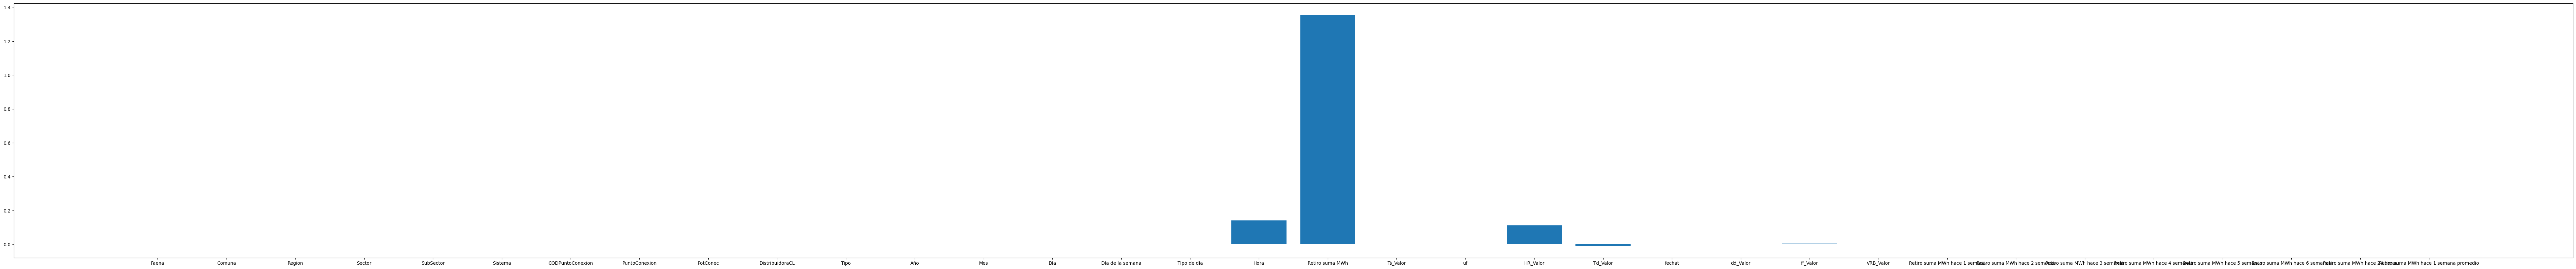

In [20]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Entrenar el modelo (pipeline) en los datos de entrenamiento
selection_pipeline.fit(X_train, y_train)

# Realizar la importancia por permutación
result = permutation_importance(selection_pipeline, X_test, y_test, random_state=2)

# Obtener las importancias de las características calculadas
importance = result.importances_mean

# Imprimir la importancia de cada característica
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))


# Obtener las columnas del DataFrame df
Columnas = df.columns

# Crear una figura de gran tamaño para el gráfico
plt.figure(figsize=(100, 10))

# Crear un gráfico de barras con las importancias de las características
plt.bar(Columnas, importance, align='center')

# Configurar las etiquetas del eje x para mostrar las columnas
plt.xticks(Columnas)

# Mostrar el gráfico
plt.show()

RED NEURONAL (correlaciones)

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
import pandas as pd

# Crear un objeto ColumnTransformer para el preprocesamiento
preprocessing = ColumnTransformer(
    [
        (
            "Scale_MinMax",
            MinMaxScaler(),
            [
                "Día",
                "Año",
                "Ts_Valor",
                "Retiro suma MWh",
                "Retiro suma MWh hace 1 semana promedio",
                "Retiro suma MWh hace 24 horas",
                "Hora",
            ],
        ),
        (
            "OrdinalEncoder",
            OrdinalEncoder(),
            [
                "Mes",
                "Día de la semana",
                "Tipo de día",
            ],
        ),
    ],
)

# Aplicar la transformación al DataFrame original df
df_procesado = preprocessing.fit_transform(df)

# Crear un nuevo DataFrame a partir de los datos transformados
processed_data_df = pd.DataFrame(df_procesado)

# Asignar nombres a las columnas del DataFrame procesado
processed_data_df = processed_data_df.set_axis([
    "Día",
    "Año",
    "Ts_Valor",
    "Retiro suma MWh",
    "Retiro suma MWh hace 1 semana promedio",
    "Retiro suma MWh hace 24 horas",
    "Hora",
    "Mes",
    "Día de la semana",
    "Tipo de día",
], axis='columns')

# El DataFrame processed_data_df ahora contiene los datos procesados y transformados

In [45]:
from sklearn.model_selection import train_test_split

# Obtener las etiquetas (labels) del conjunto de datos procesado
labels = processed_data_df.loc[:, "Retiro suma MWh"]

# Obtener las características (features) del conjunto de datos procesado
features = processed_data_df.drop(columns=[])

# Calcular la longitud total del DataFrame original df
Largo_df = len(df)

# Definir el valor de N
N = 2

# Calcular la longitud del DataFrame restando 168 veces N
Largo_df = Largo_df - 168 * N

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# El conjunto de entrenamiento se utiliza para entrenar el modelo.
# El conjunto de validación se utiliza para ajustar hiperparámetros y evaluar el rendimiento del modelo durante el entrenamiento.
# El conjunto de prueba se utiliza para evaluar el rendimiento final del modelo.

# Se utiliza train_test_split para dividir los datos de entrenamiento en conjuntos de entrenamiento y validación.
X_train, X_val, y_train, y_val = train_test_split(
    features[0:(Largo_df - 168 * 2)],  # Características de entrenamiento
    labels[168:(Largo_df - 168)],  # Etiquetas de entrenamiento
    test_size=0.1,  # Tamaño del conjunto de validación (10%)
    random_state=42  # Semilla aleatoria para reproducibilidad
)

# Se define y_test como el conjunto de etiquetas de prueba.
y_test = labels[(Largo_df - 168 + 1):Largo_df]

# Se define X_test como el conjunto de características de prueba.
X_test = features[(Largo_df - 168 * 2 + 1):(Largo_df - 168)]

In [46]:
# Reshape de X_train
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))

# Reshape de X_val
X_val = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))

# Reshape de X_test
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

2023-09-24 16:34:35.664366: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-24 16:34:35.703153: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-24 16:34:35.704036: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-24 16:34:36.884591: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/300
233/233 - 10s - loss: 0.0617 - val_loss: 0.0403 - 10s/epoch - 43ms/step
Epoch 2/300
233/233 - 1s - loss: 0.0310 - val_loss: 0.0328 - 1s/epoch - 6ms/step
Epoch 3/300
233/233 - 1s - loss: 0.0260 - val_loss: 0.0321 - 1s/epoch - 6ms/step
Epoch 4/300
233/233 - 1s - loss: 0.0243 - val_loss: 0.0297 - 1s/epoch - 6ms/step
Epoch 5/300
233/233 - 1s - loss: 0.0235 - val_loss: 0.0286 - 1s/epoch - 5ms/step
Epoch 6/300
233/233 - 1s - loss: 0.0232 - val_loss: 0.0264 - 1s/epoch - 5ms/step
Epoch 7/300
233/233 - 1s - loss: 0.0229 - val_loss: 0.0250 - 1s/epoch - 5ms/step
Epoch 8/300
233/233 - 1s - loss: 0.0225 - val_loss: 0.0233 - 1s/epoch - 5ms/step
Epoch 9/300
233/233 - 1s - loss: 0.0224 - val_loss: 0.0246 - 1s/epoch - 5ms/step
Epoch 10/300
233/233 - 1s - loss: 0.0227 - val_loss: 0.0290 - 1s/epoch - 5ms/step
Epoch 11/300
233/233 - 1s - loss: 0.0224 - val_loss: 0.0238 - 1s/epoch - 5ms/step
Epoch 12/300
233/233 - 1s - loss: 0.0221 - val_loss: 0.0232 - 1s/epoch - 5ms/step
Epoch 13/300
233/233 -

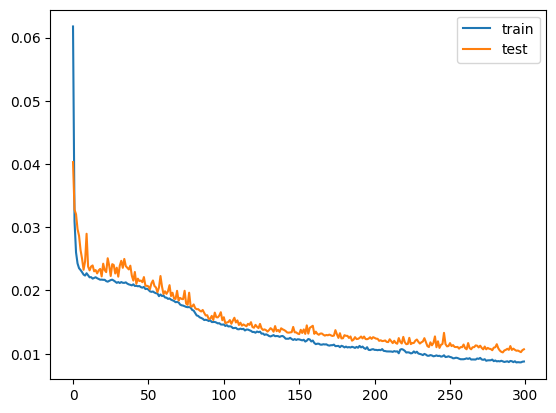

In [24]:
# Importación de bibliotecas y módulos necesarios
from math import sqrt
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot as pyplot
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Flatten
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

# Diseño de la red neuronal
model = Sequential()
model.add(Dense(100, activation="relu"))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(3))

# Compilación del modelo
model.compile(loss='mae', optimizer='adam')

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=300, batch_size=128, validation_data=(X_val, y_val), verbose=2, shuffle=False)

# Visualización del historial de pérdida
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

 65s - loss: 0.0729 - val_loss: 0.0232 - 65s/epoch - 3ms/step

 Epoch 5/5
355/355 - 1s - loss: 0.0940 - val_loss: 0.0425 - 1s/epoch - 3ms/step

In [47]:
# Realiza predicciones en el conjunto de prueba (X_test) utilizando el modelo entrenado
yhat = model.predict(X_test)

# Importa la biblioteca Keras y utiliza el módulo backend (backend as K)
from keras import backend as K

# Limpia la sesión actual de Keras para liberar recursos, como memoria GPU, si es necesario
K.clear_session()

6/6 [==============================] - 0s 2ms/step


In [48]:
# Creación de un objeto MinMaxScaler para normalizar los datos en el rango (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# Ajuste y transformación de los datos 'Retiro suma MWh' en el DataFrame df
# Esto normaliza los valores de 'Retiro suma MWh' al rango (0, 1)
scaler.fit_transform(df[['Retiro suma MWh']])

# Para la transformación inversa de los datos normalizados a su escala original
# Se revierte la normalización de y_test utilizando el método inverse_transform
y_test_final = scaler.inverse_transform([y_test])

# Se revierte la normalización de yhat[:,0] (predicciones) a su escala original
# utilizando el método inverse_transform
y_hat_final = scaler.inverse_transform([yhat[:,0]])

In [49]:
# Calcula el RMSE entre los valores reales y las predicciones
rmse = sqrt(mean_squared_error(y_test_final[0], y_hat_final[0]))

# Imprime el valor del RMSE con un formato específico
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.629


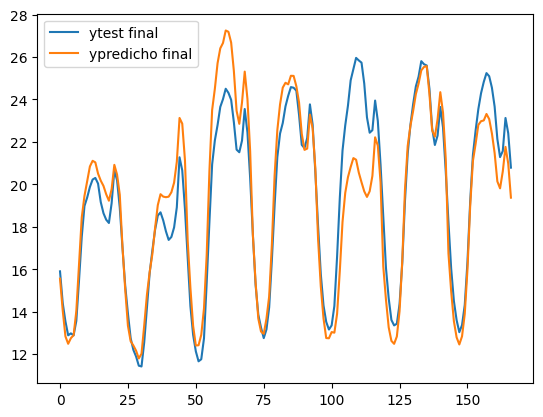

In [50]:
# Importación de la biblioteca Matplotlib para trazar gráficos
from matplotlib import pyplot as plt

# Grafica los valores reales (y_test_final[0]) y las predicciones (y_hat_final[0])
plt.plot(y_test_final[0], label="ytest final")
plt.plot(y_hat_final[0], label="ypredicho final")

# Agrega una leyenda al gráfico para identificar las líneas
plt.legend()

In [55]:
# Reorganización de las dimensiones de las variables objetivo (y_train, y_val, y_test)
y_train = y_train.values.reshape((y_train.shape[0], 1))
y_val   = y_val.values.reshape((y_val.shape[0], 1))
y_test  = y_test.values.reshape((y_test.shape[0], 1))

In [56]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape,X_test.shape , y_test.shape)

(29713, 1, 10) (29713, 1) (3302, 1, 10) (3302, 1) (167, 1, 10) (167, 1)


--------------- > Fold 1 < ---------------
Epoch 1/100
372/372 - 6s - loss: 0.0532 - val_loss: 0.0338 - 6s/epoch - 16ms/step
Epoch 2/100
372/372 - 1s - loss: 0.0288 - val_loss: 0.0375 - 1s/epoch - 4ms/step
Epoch 3/100
372/372 - 1s - loss: 0.0255 - val_loss: 0.0397 - 1s/epoch - 4ms/step
Epoch 4/100
372/372 - 1s - loss: 0.0247 - val_loss: 0.0260 - 1s/epoch - 4ms/step
Epoch 5/100
372/372 - 1s - loss: 0.0238 - val_loss: 0.0238 - 1s/epoch - 4ms/step
Epoch 6/100
372/372 - 2s - loss: 0.0234 - val_loss: 0.0245 - 2s/epoch - 4ms/step
Epoch 7/100
372/372 - 2s - loss: 0.0229 - val_loss: 0.0248 - 2s/epoch - 4ms/step
Epoch 8/100
372/372 - 2s - loss: 0.0230 - val_loss: 0.0254 - 2s/epoch - 6ms/step
Epoch 9/100
372/372 - 2s - loss: 0.0227 - val_loss: 0.0237 - 2s/epoch - 5ms/step
Epoch 10/100
372/372 - 2s - loss: 0.0226 - val_loss: 0.0230 - 2s/epoch - 5ms/step
Epoch 11/100
372/372 - 2s - loss: 0.0222 - val_loss: 0.0231 - 2s/epoch - 5ms/step
Epoch 12/100
372/372 - 2s - loss: 0.0223 - val_loss: 0.0232 - 2

  0%|          | 0/9 [00:00<?, ?it/s]

AAAA 0
BBBBBBBBBBBBBBBBBB [[0.26823437 0.26716152 0.2672649 ]
 [0.16857255 0.1687563  0.16932644]
 [0.22919428 0.22898859 0.22922319]
 ...
 [0.49385846 0.48651937 0.49041957]
 [0.27177924 0.2709912  0.27093577]
 [0.2508537  0.24984923 0.25002116]]
AAAA 1
BBBBBBBBBBBBBBBBBB [[0.30894712 0.30743873 0.307422  ]
 [0.16363019 0.16262794 0.1633185 ]
 [0.23277459 0.23349959 0.23514532]
 ...
 [0.4442813  0.43793866 0.44174027]
 [0.25289825 0.25297916 0.25274414]
 [0.26210704 0.26178837 0.26151165]]
AAAA 2
BBBBBBBBBBBBBBBBBB [[0.29878005 0.29807737 0.29785347]
 [0.1584861  0.15733466 0.15837526]
 [0.24495533 0.24392857 0.24451603]
 ...
 [0.532279   0.5272461  0.5272634 ]
 [0.28678328 0.28614286 0.28583714]
 [0.26084968 0.26067433 0.26039508]]
AAAA 3
BBBBBBBBBBBBBBBBBB [[0.34828183 0.34542084 0.34686884]
 [0.30241126 0.3008852  0.30110666]
 [0.26745865 0.26650086 0.2669576 ]
 ...
 [0.24063331 0.23962632 0.24158524]
 [0.27143484 0.27072835 0.27066836]
 [0.3008621  0.3003661  0.2998137 ]]
AAAA 4
B

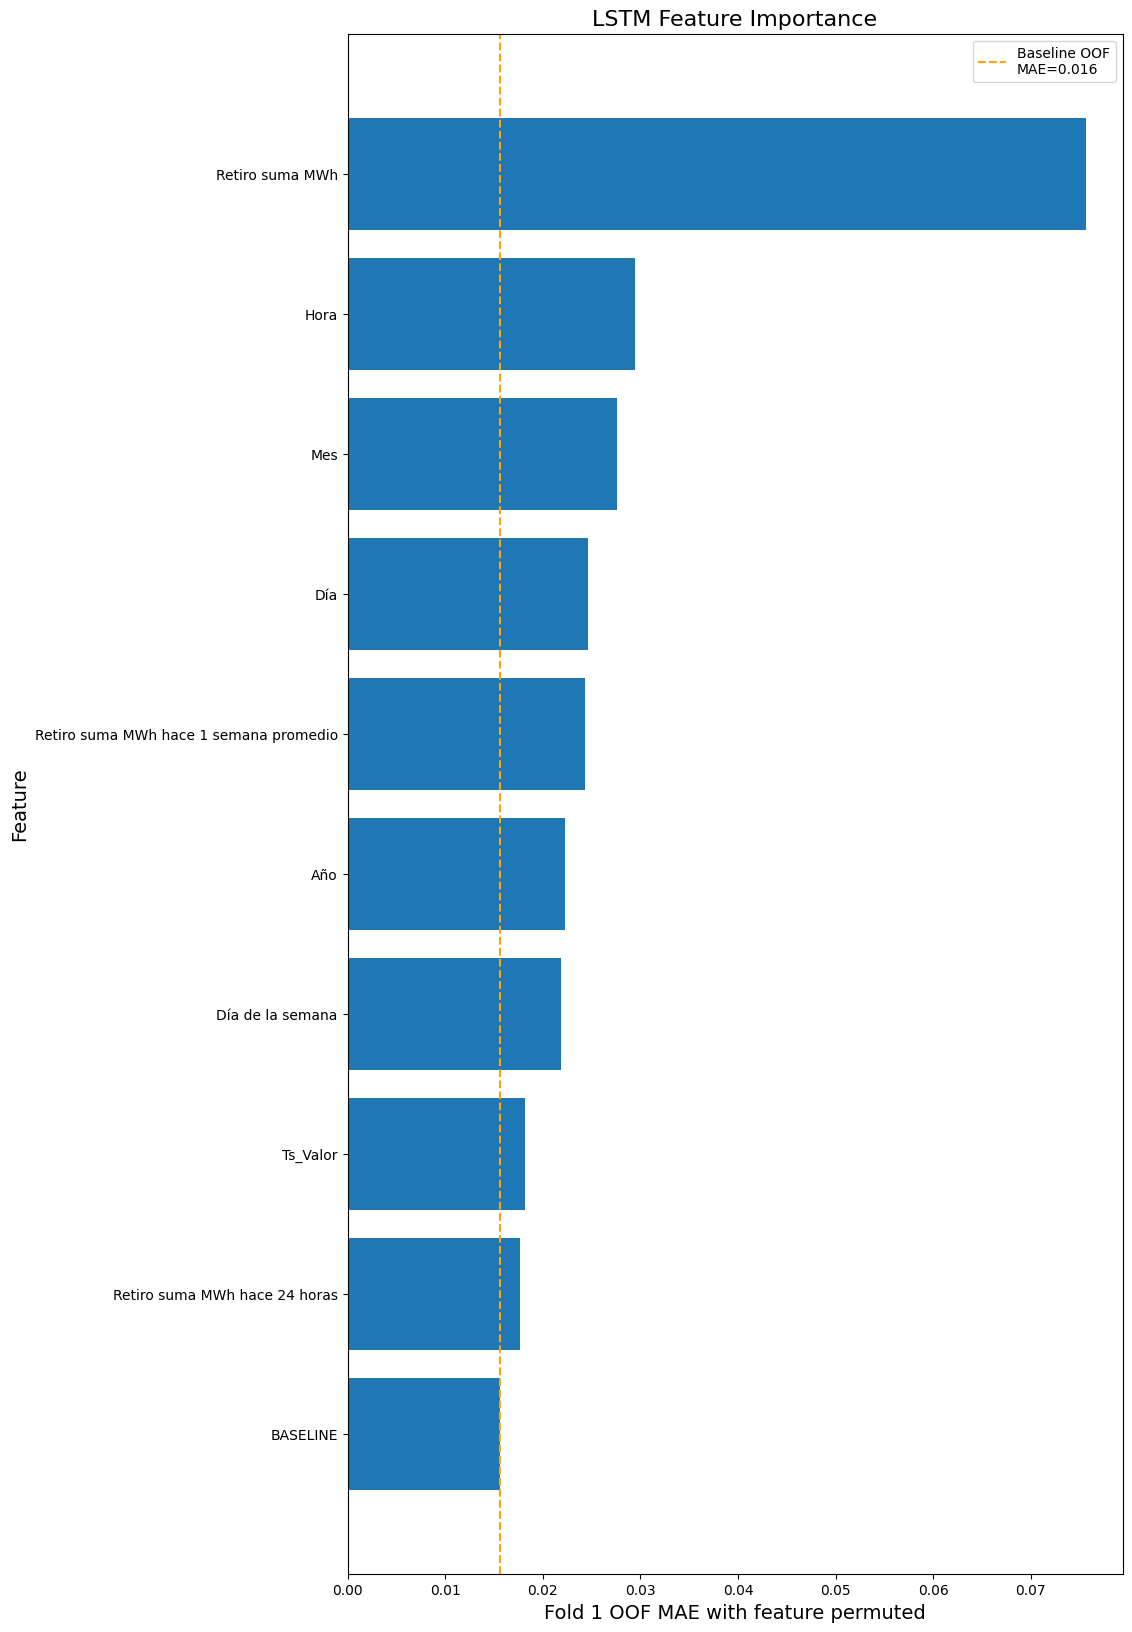

In [57]:
#Código para analizar la mportancia de atributos con red neuronal
from sklearn.model_selection import KFold
import keras
import numpy as np
from tqdm.notebook import tqdm
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf

COMPUTE_LSTM_IMPORTANCE = True
INFER_TEST = True
ONE_FOLD_ONLY = True
TRAIN_MODEL= False
EPOCH = 10
BATCH_SIZE = 38
NUM_FOLDS = 10
COLS = list(processed_data_df.drop(columns=[]).columns[:-1])
# detect and init the TPU
#tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

# instantiate a distribution strategy
#tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

# GET GPU STRATEGY
gpu_strategy = tf.distribute.get_strategy()

with gpu_strategy.scope():
    kf = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=2021)
    test_preds = []
    for fold, (train_idx, test_idx) in enumerate(kf.split(X_train, y_train)):
        K.clear_session()
        
        print('-'*15, '>', f'Fold {fold+1}', '<', '-'*15)
        X_train, X_valid = X_train[train_idx], X_train[test_idx]
        y_train, y_valid = y_train[train_idx], y_train[test_idx]
        
        checkpoint_filepath = f"folds{fold}.hdf5"
        if TRAIN_MODEL:
          a=1
        else:
            model = Sequential()
            model.add(Dense(100, activation= "relu"))
            model.add(LSTM(50,return_sequences=True))
            model.add(LSTM(50,return_sequences=True))
            model.add(Flatten())
            model.add(Dense(100, activation= "relu"))
            model.add(Dense(100, activation= "relu"))
            model.add(Dense(3))

            model.compile(loss='mae', optimizer='adam')
            history = model.fit(X_train, y_train, epochs=100, batch_size=72, validation_data=(X_val, y_val), verbose=2, shuffle=False)
        if INFER_TEST:
            print(' Predicting test data...')
            test_preds.append(model.predict(X_test,verbose=0).squeeze().reshape(-1, 1).squeeze())
                    
        if COMPUTE_LSTM_IMPORTANCE:
            results = []
            print(' Computing LSTM feature importance...')
            
            # COMPUTE BASELINE (NO SHUFFLE)
            oof_preds = model.predict(X_val, verbose=0).squeeze() 
            print("ACAAAAAAAAAAAAAAAAAAAAA",oof_preds)
            baseline_mae = np.mean(np.abs( oof_preds-y_val))
            results.append({'feature':'BASELINE','mae':baseline_mae})           

            for k in tqdm(range(len(COLS))):
                print("AAAA",k)
                # SHUFFLE FEATURE K
                save_col = X_val[:,:,k].copy()
                np.random.shuffle(X_val[:,:,k])
                        
                # COMPUTE OOF MAE WITH FEATURE K SHUFFLED
                oof_preds = model.predict(X_val, verbose=0).squeeze() 
                print("BBBBBBBBBBBBBBBBBB",oof_preds)
                mae = np.mean(np.abs( oof_preds-y_val ))
                results.append({'feature':COLS[k],'mae':mae})
                X_val[:,:,k] = save_col
         
            # DISPLAY LSTM FEATURE IMPORTANCE
            print()
            df = pd.DataFrame(results)
            df = df.sort_values('mae')
            plt.figure(figsize=(10,20))
            plt.barh(np.arange(len(COLS)+1),df.mae)
            plt.yticks(np.arange(len(COLS)+1),df.feature.values)
            plt.title('LSTM Feature Importance',size=16)
            plt.ylim((-1,len(COLS)+1))
            plt.plot([baseline_mae,baseline_mae],[-1,len(COLS)+1], '--', color='orange',
                     label=f'Baseline OOF\nMAE={baseline_mae:.3f}')
            plt.xlabel(f'Fold {fold+1} OOF MAE with feature permuted',size=14)
            plt.ylabel('Feature',size=14)
            plt.legend()
            plt.show()
                               
            # SAVE LSTM FEATURE IMPORTANCE
            df = df.sort_values('mae',ascending=False)
            df.to_csv(f'lstm_feature_importance_fold_{fold+1}.csv',index=False)
                               
        # ONLY DO ONE FOLD
        if ONE_FOLD_ONLY: break

In [ ]:
print(df)

In [38]:
y_val

17934    0.278494
6696     0.161810
19799    0.240703
2127     0.218453
15218    0.303216
           ...   
17666    0.306391
509      0.193624
30856    0.556770
15586    0.259754
24498    0.278564
Name: Retiro suma MWh, Length: 3302, dtype: float64